# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [276]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
from os import path
import numpy as np

In [277]:
plt.rcParams['axes.facecolor'] = 'xkcd:dark gray'
plt.rcParams['figure.facecolor'] = 'xkcd:dark gray'
plt.rcParams['xtick.color'] = 'xkcd:light gray'
plt.rcParams['xtick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['ytick.color'] = 'xkcd:light gray'
plt.rcParams['ytick.labelcolor'] = 'xkcd:light gray'
plt.rcParams['axes.edgecolor'] = 'xkcd:gray'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'xkcd:light gray'
plt.rcParams['text.color'] = 'xkcd:light gray'


In [278]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [279]:
out_path = 'output'

In [280]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [281]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [282]:
# Create a Beautiful Soup Object
soup = bs(browser.html, 'html.parser')

In [283]:
# Extract all rows of data
scraped_rows = soup.find_all('tr', class_='data-row')
scraped_rows[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [284]:
headers = [h.text for h in soup.find('tbody').find_all('th')]
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [285]:
# Create an empty list
data_rows = [[item.text.strip() for item in row.find_all('td')] for row in scraped_rows]
# Loop through the scraped data to create a list of rows
[data_rows[i] for i in range(5)]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [286]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_df = pd.DataFrame(data_rows, columns=headers)
data_df['id'] = pd.to_numeric(data_df['id'])
data_df = data_df.set_index('id', drop=True)


In [287]:
# Confirm DataFrame was created successfully
data_df.head()

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [288]:
# Examine data type of each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   terrestrial_date  1867 non-null   object
 1   sol               1867 non-null   object
 2   ls                1867 non-null   object
 3   month             1867 non-null   object
 4   min_temp          1867 non-null   object
 5   pressure          1867 non-null   object
dtypes: object(6)
memory usage: 102.1+ KB


In [289]:
# Change data types for data analysis
data_df_typed = data_df.astype({
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int',
    'ls': 'int',
    'month': 'int',
    'min_temp': 'float64',
    'pressure': 'float64'
})
data_df_typed.dtypes

terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [290]:
# Confirm type changes were successful by examining data types again
data_df_typed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int32         
 2   ls                1867 non-null   int32         
 3   month             1867 non-null   int32         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3)
memory usage: 80.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [291]:
# 1. How many months are there on Mars?
mars_by_month = data_df_typed.groupby('month')

mars_by_month['month'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [292]:
# 2. How many Martian days' worth of data are there?
len(data_df_typed['sol'].unique())

1867

In [293]:
# 3. What is the average low temperature by month?
min_temp_avg = mars_by_month['min_temp'].mean()
min_temp_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

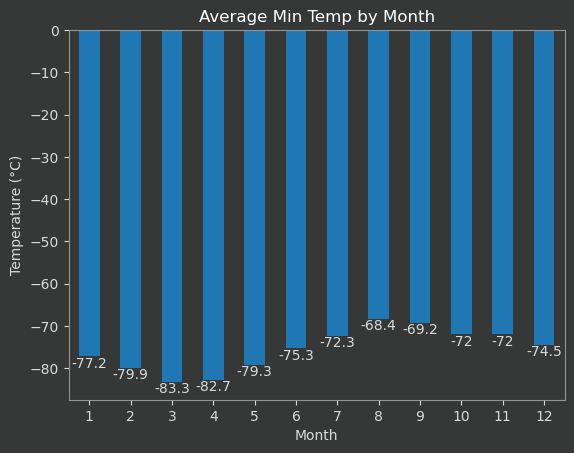

In [294]:
# Plot the average temperature by month
min_temp_bar = min_temp_avg.round(1).plot(kind='bar', title='Average Min Temp by Month',xlabel='Month',ylabel='Temperature (°C)',grid=(False))
plt.xticks(rotation=0)
for month in min_temp_bar.containers:
    min_temp_bar.bar_label(month)
plt.savefig(path.join(out_path, 'min_temp_avg'))
plt.show()

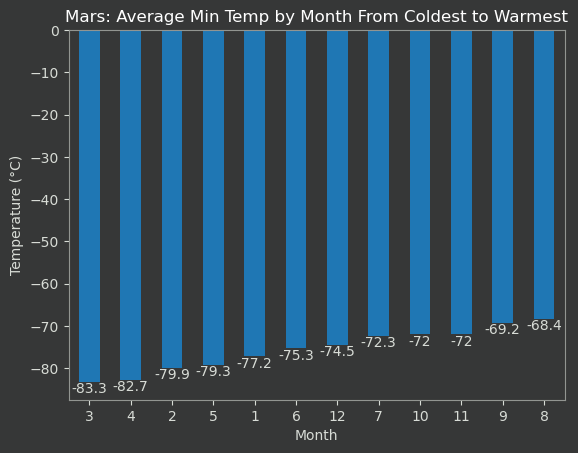

In [295]:
# Identify the coldest and hottest months in Curiosity's location
min_temp_sorted_bar = min_temp_avg.round(1).sort_values().plot(kind='bar', title='Mars: Average Min Temp by Month From Coldest to Warmest',xlabel='Month',ylabel='Temperature (°C)',grid=(False))
plt.xticks(rotation=0)
for month in min_temp_sorted_bar.containers:
    min_temp_sorted_bar.bar_label(month)
plt.savefig(path.join(out_path, 'min_temp_sorted'))
plt.show()

In [296]:
# 4. Average pressure by Martian month
press_avg = mars_by_month['pressure'].mean()
press_avg

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

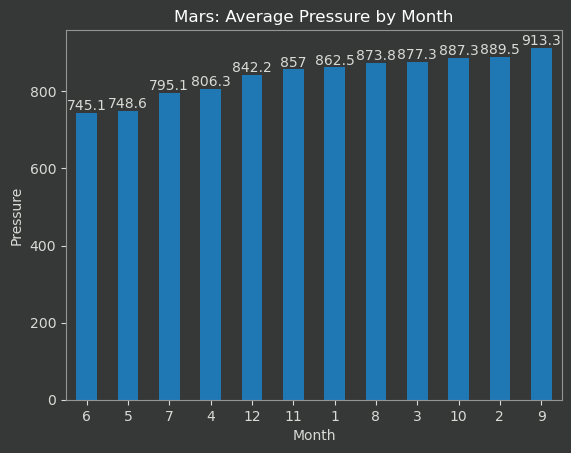

In [297]:
# Identify the coldest and hottest months in Curiosity's location
pressure_avg_bar = press_avg.round(1).sort_values().plot(kind='bar', title='Mars: Average Pressure by Month',xlabel='Month',ylabel='Pressure',grid=(False))
plt.xticks(rotation=0)
for month in pressure_avg_bar.containers:
    pressure_avg_bar.bar_label(month)
plt.savefig(path.join(out_path, 'pressure_avg_by_month'))
plt.show()

In [298]:
min_temp_sorted = data_df_typed.set_index('sol')['min_temp']


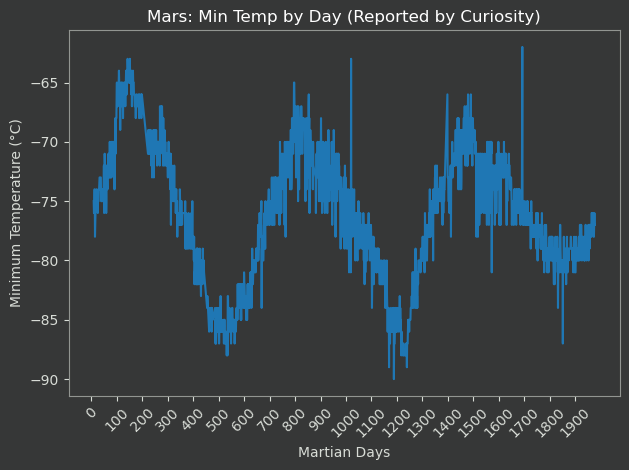

In [299]:
# 5. How many terrestrial (earth) days are there in a Martian year?
min_temp_sorted.plot(kind='line')
plt.title('Mars: Min Temp by Day (Reported by Curiosity)')
plt.xlabel('Martian Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(False)

plt.xticks(np.arange(0, 2000, 100), rotation=45)

plt.tight_layout()
plt.savefig(path.join(out_path, 'min_temp_by_day'))
plt.show()

# Analysis

## Coldest and Warmest Months
According to the data provided the warmest month is actually the 8th month and the coldest month is the 3rd out the the twelve months in the dataset but this does appear ot be in earth months seeing as mars has 687 days and 24 months according to a quick google search but nowhere in the data did it give reference to months above 12.

## Atmosphere
Atmospheric pressure on mars 745 in the 6th month and 842 of pressure in the 9th month.

## Number of Earth Days on Mars
According to the data it appears there's approxomently 675 days to plot, and again according to a quick google search it appears there is nearly double the amount of days and months on mars with 687 days and 24 months.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [300]:
# Write the data to a CSV
data_df_typed.to_csv(path.join(out_path, 'mars_data_scraped.csv'), index=False, header=True)

In [301]:
browser.quit()